## 이번 모듈에서 다루는 내용

- 선형회귀 설명
- Linear Regression
- Ridge
- Lasso

### 선형 모델
#### 선형 회귀 모델

- Linear Regression : 가장 간단하고 오래된 회귀용 선형 알고리즘
- 예측모델 : 예측을 하기 위해 한 개인의 특성들을 종합적으로 고려하는 도구
- 선형회귀모델 : 각 특성별로 가중치를 부여한후 그것들을 다 더하는 것

- 예를들면 광고마케팅 전화를 할때, 오후 4시이후는 12점 성공확률을 높아질수 있으며, 남성보다는 여성이 17.8점이 높아지고, 상품구매이력이 최근일수록 33점이 높아질수 있다는 식이다. 그밖에 가입일, 추가옵션사용여부, 가족사항, 주소지등에 따라 각종 요소들이 전화마케팅성공에 영향을 미칠수 있고, 각 요소들은 그 개인의 최종점수를 높이거나 낮추는 역할

- 와인 품질 = 12.145 + (0.00117x겨울철 강수량)          + (0.064x 재배철 평균기온) - (0.00386x 수확기 강수량)


$y = ax1 + bx2 + cx3 + d$


$y = WX + b$

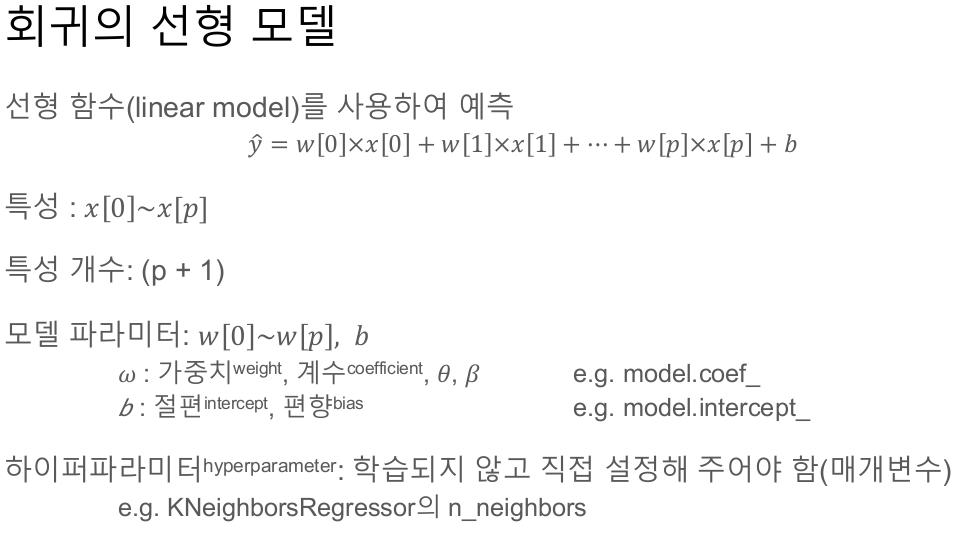

In [1]:
%matplotlib inline
from preamble import *
from mglearn import *

w[0]: 0.393906  b: -0.031804


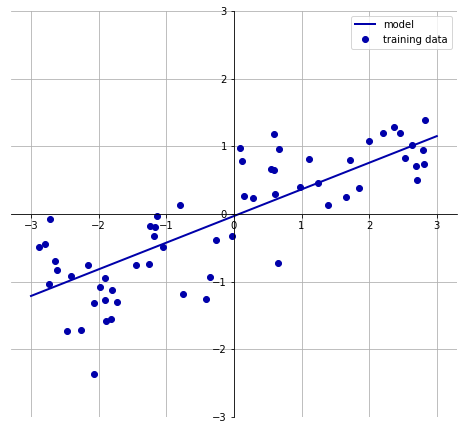

In [2]:
# 샘플 데이터
mglearn.plots.plot_linear_regression_wave()
# w[0]:기울기

- 직선형 모델이 많은 정보를 잃는 것처럼 보이지만 특성(피처)가 하나가 아니므로 (보통 수~수백개) 이들의 선형 조합은 충분히 잘 동작한다.

### 선형회귀 (Linear Regression - 가장간단하고 오래된 회귀용 선형 알고리즘)
- 최소제곱법을 가장 많이 사용한다
- MSE를 최소화 하는 것을 목표로 한다 (예측 오차의 자승의 평균치)
- 아래는 모델을 선형회귀로 선택하고, 훈련데이터로 학습(fit) 시키는 코드이다
- 시스템이 구한 내부 변수는 뒤에 "_"를 붙인 것이 많다

In [3]:
import mglearn
from sklearn.linear_model import LinearRegression #암기
X, y = mglearn.datasets.make_wave(n_samples=60)

from sklearn.model_selection import train_test_split #암기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [4]:
print("계수: {}".format(lr.coef_))
print("절편: {}".format(lr.intercept_))

계수: [0.394]
절편: -0.031804343026759746


In [5]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))
#훈현세트와 테스트세트의 점수가 낮으면서 매우 비슷 -> 과소적합

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


- score가 0.66이면 성능이 좋은 것은 아니다
- make_wave() 데이터 자체가 상관관계가 높지 않다 (오차가 크다)
- 보스턴 주택가격 데이터 사용예 (확장된 피처를 사용했다)

In [6]:
!pip install mglearn

In [7]:
import mglearn
import sklearn

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [9]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [10]:
X_train.shape

(379, 104)

In [11]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))
#훈련세트에서만 매우 정확! -> 과대적합

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


- 위의 결과는 특성이 많아 가중치가 풍부해져 과대적합이 됨

### 일반화의 방법 (Regualization, 규제)
- L2규제: 계수들의 자승의 합을 줄이는 방법. 여러변수가 골고루 반영되기를 원하는 방향으로 일반화하기 위한 방법임, 릿지
- 예)특정과목만 잘하는 학생은 싫다. 자승의 합을 최소화. 알파가 커지면 L2의 영향이 커짐 0로 수렴되면 MSE. 큰놈을 먼저 죽이게 됨. 즉 오차가 큰 특성을 먼저 없애는 효과 
- L1규제: 계수들의 절대치의 합을 줄이는 방법. 큰놈과 작은놈의 오차를 동일시 함 모든것을 동등하게 조절하게 됨.  => 약한특성은 사라져버림. 가중치의 갯수를 줄이는 효과. 즉 모두 동일한 조건으로 줄여서, 약한특성을 먼저 없애는효과가 있음, 라소

## 릿지 회귀

- 일반적인 선형회귀에 추가로 제약을 가한 것 
- 가중치의 절대값을 가능한 작게 제한 함. 즉 전체적으로 계수의 크기가 작게 만드는 것 
- 또는 모든 계수들을 골고루 반영되게 하는 효과를 얻음
- Regularization으로 L2 규제에 해당한다 (규제란 과적합을 막기 위해서 필요한 제한을 말한다)
- L2 놈의 제곱을 페널티로 사용한다 (알파 계수)
- 알파값이 클수록 제약을 크게 정한 것으로 계수의 값이 작아진다

In [12]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


- 리지 모델를 사용한 결과, (가중치가 규제되어) 과대적합이 줄고 테스트 점수가 높아진 것을 알 수 있다.
- 규제화를 하는 정도를 알파 값을 바꾸면서 여러가지로 확인해볼 수 있다.
- 규제를 많이 할수록 일반화는 유리하나 성능이 떨어지는 단점이 있다
- 아래는 알파를 10, 0.1 등으로 바꾸어 보았다

In [34]:
ridge01 = Ridge(alpha=0.039).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.94
테스트 세트 점수: 0.76


- 위 결과는 제약이 너무 커져서 과소적합이 된 것임

In [14]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 10, 100]

In [15]:
for al in alpha_list:
    ridge10 = Ridge(al).fit(X_train, y_train)
    print ("알파 = ",  al)
    print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
    print("        테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

알파 =  0.0001
훈련 세트 점수: 0.95
        테스트 세트 점수: 0.62
알파 =  0.001
훈련 세트 점수: 0.95
        테스트 세트 점수: 0.63
알파 =  0.005
훈련 세트 점수: 0.95
        테스트 세트 점수: 0.67
알파 =  0.01
훈련 세트 점수: 0.94
        테스트 세트 점수: 0.70
알파 =  0.05
훈련 세트 점수: 0.93
        테스트 세트 점수: 0.76
알파 =  0.1
훈련 세트 점수: 0.93
        테스트 세트 점수: 0.77
알파 =  1
훈련 세트 점수: 0.89
        테스트 세트 점수: 0.75
알파 =  10
훈련 세트 점수: 0.79
        테스트 세트 점수: 0.64
알파 =  100
훈련 세트 점수: 0.60
        테스트 세트 점수: 0.42


In [16]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


### 계수 값 살펴보기
- 여러가지 리지 회귀분석 결과로 얻는 계수를 보면 이들의 특징을 비교하기가 쉽다
- 아래는 계수의 분포를 그리는 코드이다
- 결과를 보면 규제를 많이 할수록(알파가 클수록) 계수들이 작은 값을 갖는다 (큰 차이가 없게 편차를 줄인 효과이다)

In [17]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

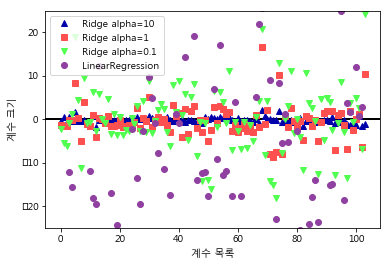

In [18]:

plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

- 훈련 데이터 수를 늘이면 어떤 차이가 나타나는가? 규제를 덜해도 된다.
- 학습데이터를 늘리면서 나타나는 학습결과를 그려보는 것을 학습곡선이라고 한다 (learning curve)
- 아래 결과를 보면 리지 알고리즘의 성능이 일반 선형회귀보다 매우 좋은 것을 알 수 있다
- 그러나 데이터의 규모가 커지면 규제항이 덜 중요해져서 릿지 회귀의 성능이 선형회귀와 같아진다 (데이터가 많아질수록 모델이 데이터를 기억하거나 과적합하기가 어렵다)

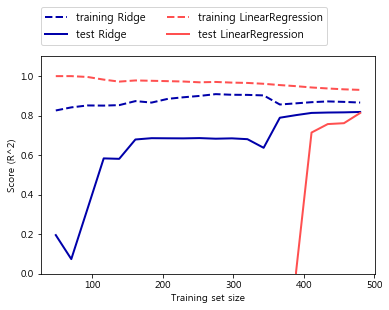

In [19]:
mglearn.plots.plot_ridge_n_samples()

### Lasso 규제
- 릿지 회귀처럼 계수의 크기를 최소화 한다. 단 L1 규제를 사용한다.
- 일부 계수는 0으로 수렴해버리므로 특성 선택이 자동으로 이루어지는 셈이 된다
- **모델을 이해하기 쉬워지고 어떤 특성이 중요한지를 파악하기 쉬워진다** => 특성선택의 효과

- 훈련데이터와 테스트 데이터에 대해 score가 비슷하면 과소적합이다

In [20]:
import numpy as np

In [21]:
from sklearn.linear_model import Lasso

# 기본값: alpha=1.0, max_iter=1000
lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso.coef_ != 0)))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


- 위 결과, 과소적합! 즉 규제가 너무 큼

In [36]:
print(lasso)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


- 위의 결과를 보면 겨우 4개의 특성만 사용함으로써 성능이 좋지 않은 것을 알 수 있다.(알파값이 현재 1로 설정되어 있다)
- 알파값을 0.01로 바꾸어 보겠다. (특성을 33개 사용하고 성능도 좋아졌다)


In [38]:
# "max_iter" 기본 값을 증가시키지 않으면 max_iter 값을 늘이라는 경고가 발생합니다
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso001.coef_ != 0)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [48]:
lasso001 = Lasso(alpha=0.007, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso001.coef_ != 0)))

훈련 세트 점수: 0.91
테스트 세트 점수: 0.78
사용한 특성의 개수: 38


In [24]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso00001.coef_ != 0)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


- 위와 같이 규제를 너무 낮추면 LinearRegression과 비슷

Text(0, 0.5, '계수 크기')

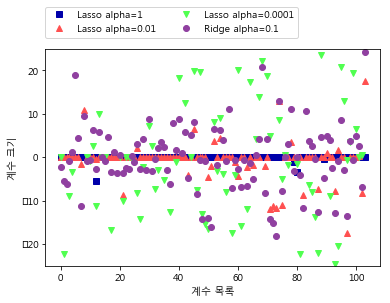

In [25]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

- 일반적으로 리지 알고리즘이 널리 사용된다.
- 라소는, 특징의 갯수를 줄이려고 할 때 사용된다 (모델을 간단하게 만들어 해석을 쉽게 하게 해준다)

- **많은 특성 중 일부만 중요하다고 판단되면? 분석하고 이해하기 쉬운 모델을 원할때는? 라쏘!**